# ROI Node Detection in Xray Images
#### Author: Mamona Awan

Starting from loading the Images from directory path and displaying the inputs as given. Below is the code for setting environment and loading the Input images from the directory.

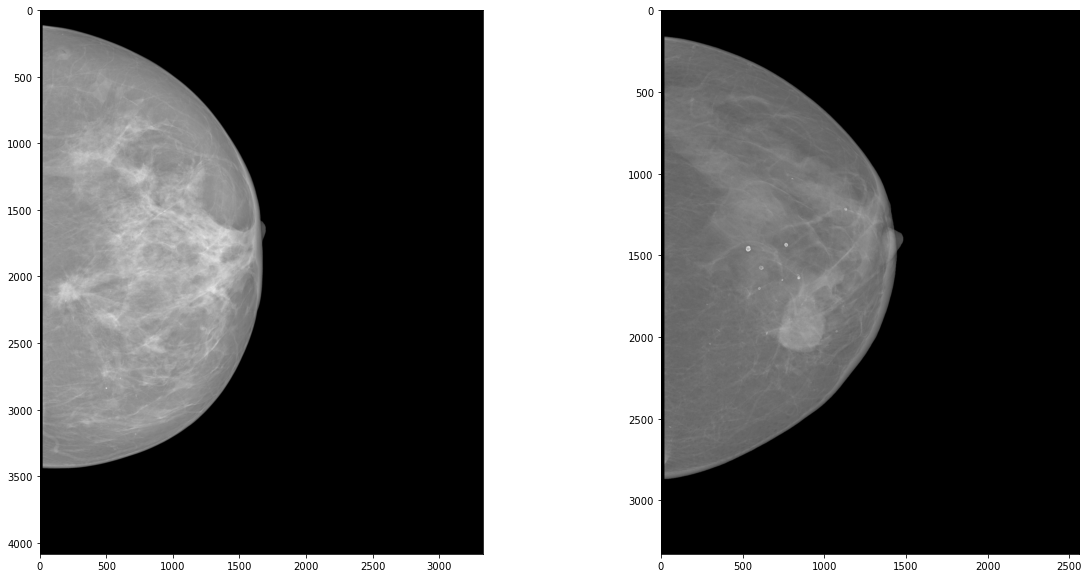

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

%matplotlib inline

#loading the images from the directory
def get_image(image_path):
    image = cv2.imread(image_path)
    return image

#directory path of images
images_path = '...\Xrays'
images = []

#loading multiple files from the directory
for file in os.listdir(images_path):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(images_path, file)))

#displaying multiple images in the window
def show_all(images):
    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='Greys_r')

show_all(images)



The main idea behind detecting the ROI nodes is their stark difference as constituents in the image. 

1. The ROIs follow a general rule of being a closed formation which may or may not have a significant intensity difference from the neighborhood. Hence, the focus is on finding the convex formation of a closed polygon in external contours detected in the edges found by canny edge detection. 
2. Taking in account of another restriction followed by these ROI is the minute size, so all extensive contours should be removed.  

<Figure size 1440x720 with 0 Axes>

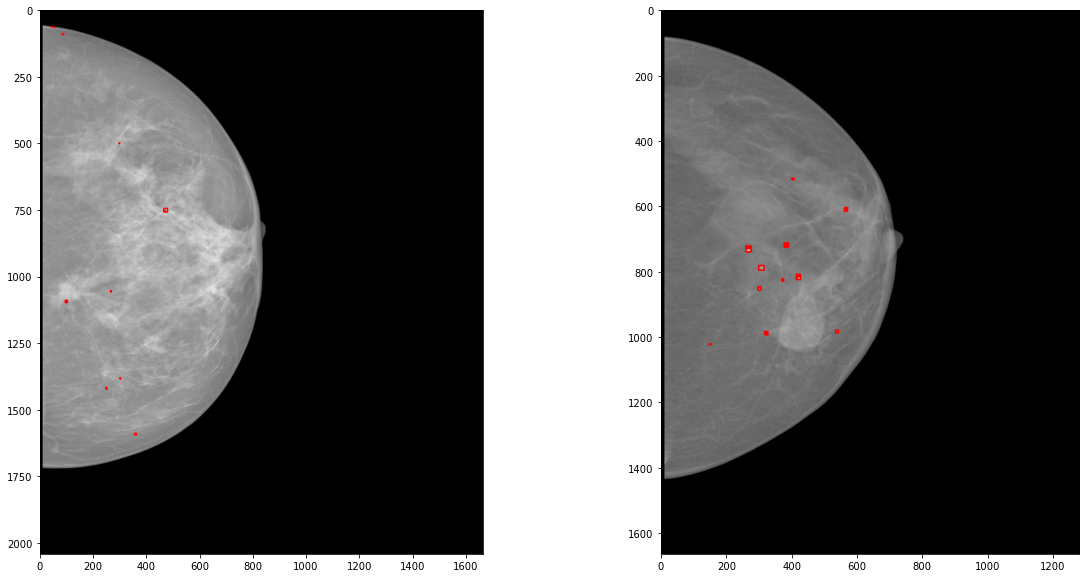

In [42]:
#Main function to DETECT and MARK ROI (Region of Interest) in the input images
def get_roi(image):
    # percent of original size
    scale_percent = 50            
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    
    #new dimensions
    dim = (width, height) 
    
    #resizing the image to decrease computation time
    r_img = cv2.resize(image,dim, interpolation = cv2.INTER_AREA)
    
    #finding the edges of significant nodes
    r_ed_img = cv2.Canny(r_img,50,200)
    
    #finding the contours and their hierarchy in the detected edges
    #also refining the contoures to  elimiate unwanted contours 
    contours, hierarchy = cv2.findContours(r_ed_img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    de_contours = []
    for con in contours:
        con_area = cv2.contourArea(con)
        if (con_area < 500):
            de_contours.append(con)
    
    #drawing the Rectangles over the source images
    for comp in de_contours:
        x,y,w,h = cv2.boundingRect(comp)
        cv2.rectangle(r_img,(x,y),(x+w,y+h),(255,0,0),3)
               
    return r_img

#Empty list for storing the Output Images 
roi_imgs = []

#Display function for Output
def show_ROIs(images):
    for i in range (len(images)):
        #calling the function to detect the ROI(region of interest in the images)
        roi_img= get_roi(images[i])
        #storing the multiple images into a list kernel
        roi_imgs.append(roi_img)
    
    show_all(roi_imgs)
    
plt.figure(figsize = (20, 10))


#Displaying FINAL output images
show_ROIs(images)
    

RESULTS: The Suspected ROI Nodes are finally marked with RED Color over the same input images.